In [57]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from matplotlib.pyplot import figure

In [6]:
song, _ = librosa.load('/Users/msf/Datasets/GTZAN_Dataset/genres_original/blues/blues.00000.wav')

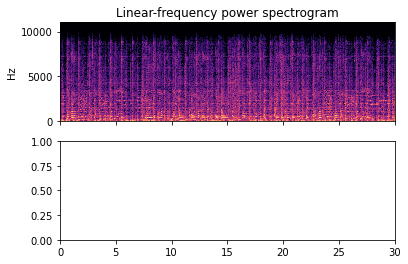

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(song)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

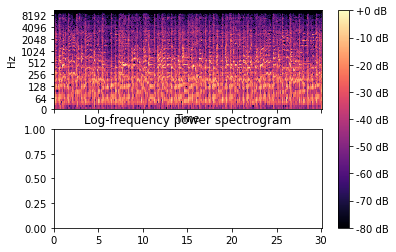

<Figure size 1440x1080 with 0 Axes>

In [31]:
hop_length = 1024
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
figure(figsize=(20,15))
D = librosa.amplitude_to_db(np.abs(librosa.stft(song, hop_length=hop_length)), ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time', ax=ax[0])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [45]:
hop_length = 1024

def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(Y, sr=sr, hop_length=hop_length, x_axis="time", y_axis=y_axis)
    plt.colorbar(format="%+2.f")

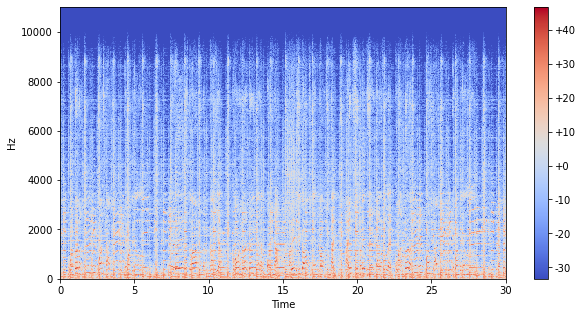

In [54]:
Y_log = librosa.power_to_db(np.abs(librosa.stft(song, hop_length=hop_length))**2)
plot_spectrogram(Y_log, sr, hop_length)

In [62]:
mfcc_song = librosa.feature.mfcc(song, n_mfcc=13, sr=sr)

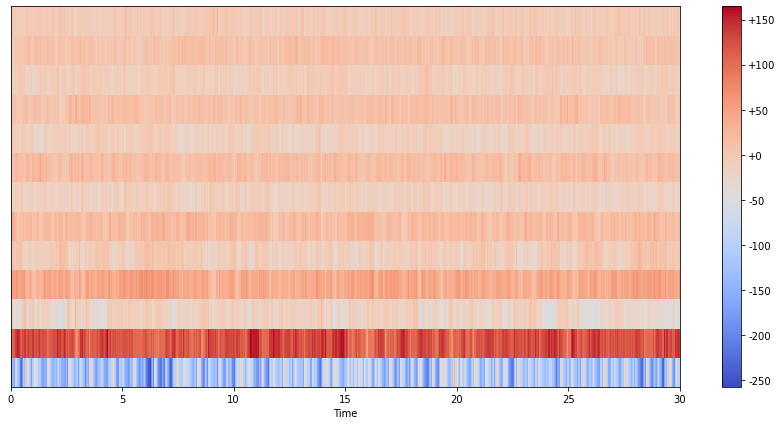

In [63]:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfcc_song, 
                         x_axis="time", 
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [64]:
mfcc_song.shape

(13, 1293)

In [5]:
mfcc_piano = librosa.feature.mfcc(y=piano, sr=sr, n_mfcc=13)

In [6]:
mfcc_piano.shape

(13, 21380)

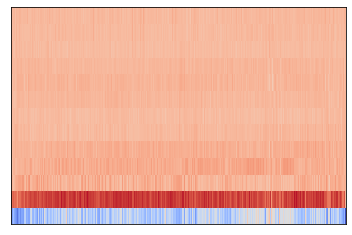

In [7]:
librosa.display.specshow(mfcc_piano)

In [8]:
mfcc_delta = librosa.feature.delta(mfcc_piano)
mfcc_delta2 = librosa.feature.delta(mfcc_piano, order=2)

In [9]:
mfcc_features = np.concatenate((mfcc_piano, mfcc_delta, mfcc_delta2))

In [10]:
mfcc_features.shape

(39, 21380)

In [11]:
len(piano)/21380

511.97605238540694

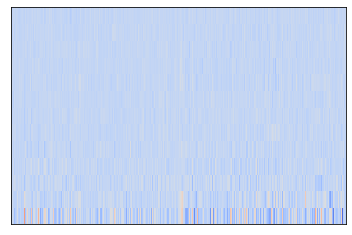

In [12]:
librosa.display.specshow(mfcc_delta)

In [2]:
import numpy as np
import os
import pandas as pd

In [24]:
data = pd.read_csv('/Users/msf/GitHub/Spotify_Data_Analysis/Dataset/tracks.csv')

In [25]:
data.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [26]:
data.sort_values(by='popularity', ascending=False).head(50)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.1320,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.4720,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.7190,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.2350,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.5430,89.087,3
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.6820,168.021,4


In [31]:
df = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [32]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [35]:
target = data[['popularity']]

In [36]:
target

,popularity
0,6
1,0
2,0
3,0
4,0
...,...
586667,50
586668,72
586669,70
586670,58


In [37]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X = [[0],[1],[2],[3]]
y = [0, 0, 1, 1]

In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [10]:
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [11]:
print(neigh.predict([[1.1]]))

[0]


In [12]:
print(neigh.predict_proba([[0.9]]))

[[0.66666667 0.33333333]]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

(array([  3.,  11.,  44., 142., 223., 257., 193.,  96.,  23.,   8.]),
 array([-3.50622335, -2.84044632, -2.17466929, -1.50889227, -0.84311524,
        -0.17733822,  0.48843881,  1.15421583,  1.81999286,  2.48576989,
         3.15154691]),
 <BarContainer object of 10 artists>)

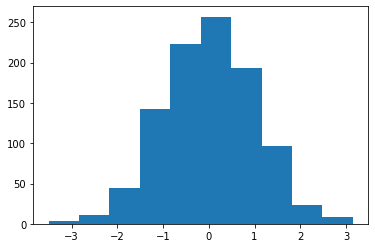

In [21]:
a = np.random.normal(size=1000)
plt.hist(a)

In [23]:
mydict = {}

mydict = {
    'type' : ['car', 'bike', 'bus'],
    'owner' : ['private', 'public']
}

In [27]:
mydict['type']

['car', 'bike', 'bus']

In [25]:
type(mydict)

dict

In [3]:
import pandas as pd

In [5]:
df = pd.read_csv("/Users/msf/Documents/AWS ML Specialty/Course_AWS_Certified_Machine_Learning-master/Chapter5/car_data.csv")

In [6]:
df.head(10)

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5
5,Corvette,2012,230.0,23.0,31200,3,Car Town,2013-04-10,4
6,Corvette,2012,300.0,21.5,44100,3,Uptown Cars,2015-12-13,12
7,Corvette,2012,300.0,24.0,39300,2,Big Bobs,2013-05-19,5
8,Corvette,2012,230.0,23.0,36900,3,Uptown Cars,2015-04-27,4
9,Corvette,2013,230.0,22.5,37200,2,Car Town,2013-12-15,12


In [1]:
from music21 import * # works in combination with MuseScore

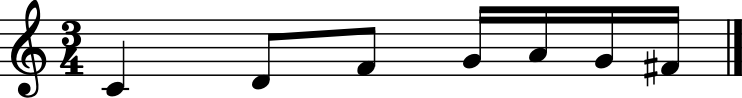

In [7]:
converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#").show()

In [5]:
print (serial.rowToMatrix([2,1,9,10,5,3,4,0,8,7,6,11]) )

  0 11  7  8  3  1  2 10  6  5  4  9
  1  0  8  9  4  2  3 11  7  6  5 10
  5  4  0  1  8  6  7  3 11 10  9  2
  4  3 11  0  7  5  6  2 10  9  8  1
  9  8  4  5  0 10 11  7  3  2  1  6
 11 10  6  7  2  0  1  9  5  4  3  8
 10  9  5  6  1 11  0  8  4  3  2  7
  2  1  9 10  5  3  4  0  8  7  6 11
  6  5  1  2  9  7  8  4  0 11 10  3
  7  6  2  3 10  8  9  5  1  0 11  4
  8  7  3  4 11  9 10  6  2  1  0  5
  3  2 10 11  6  4  5  1  9  8  7  0


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn import ensemble

In [2]:
df = pd.read_csv('/Users/msf/GitHub/Categorical_Feat_Challenge/input/train.csv')

In [4]:
df.head(5)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


<AxesSubplot:>

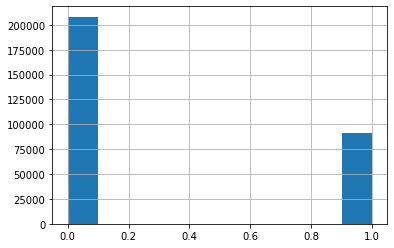

In [7]:
df['target'].hist()

In [9]:
collist = df.columns.tolist()

In [11]:
collist[:-1]

['id',
 'bin_0',
 'bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'nom_0',
 'nom_1',
 'nom_2',
 'nom_3',
 'nom_4',
 'nom_5',
 'nom_6',
 'nom_7',
 'nom_8',
 'nom_9',
 'ord_0',
 'ord_1',
 'ord_2',
 'ord_3',
 'ord_4',
 'ord_5',
 'day',
 'month']

In [12]:
y = df['target'].values
X = df[collist[:-1]].values

In [14]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [15]:
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [16]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 59985  59986  59987 ... 299997 299998 299999] TEST: [    0     1     2 ... 60045 60048 60050]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [ 59985  59986  59987 ... 120005 120007 120008]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [119984 119987 119990 ... 180252 180253 180254]
TRAIN: [     0      1      2 ... 299997 299998 299999] TEST: [179893 179894 179895 ... 240091 240092 240093]
TRAIN: [     0      1      2 ... 240091 240092 240093] TEST: [239772 239773 239784 ... 299997 299998 299999]


In [18]:
df['kfold'] = -1

In [20]:
# select a random sample, the entire df if frac=1
# and initialize new index.

df = df.sample(frac=1).reset_index(drop=True)

In [21]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,kfold
0,99674,1,0,1,F,N,Green,Trapezoid,Lion,Russia,...,1,Grandmaster,Warm,j,P,Sc,1,9,1,-1
1,79721,0,0,0,T,N,Blue,Circle,Axolotl,Russia,...,2,Expert,Freezing,h,N,vK,2,7,0,-1
2,95494,1,0,0,T,Y,Red,Circle,Axolotl,Russia,...,1,Grandmaster,Lava Hot,l,J,Wv,2,11,0,-1
3,216076,0,0,0,F,Y,Red,Trapezoid,Dog,Finland,...,1,Expert,Boiling Hot,f,U,aM,2,4,0,-1
4,234610,0,0,0,T,N,Blue,Circle,Snake,China,...,1,Master,Freezing,k,C,MV,3,11,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,268193,0,0,1,F,N,Green,Triangle,Hamster,Costa Rica,...,1,Grandmaster,Freezing,f,V,zU,7,7,1,-1
299996,194492,0,0,0,F,Y,Green,Star,Axolotl,Costa Rica,...,3,Novice,Hot,k,T,ZR,7,11,1,-1
299997,276104,0,0,0,T,N,Red,Triangle,Cat,Russia,...,1,Novice,Freezing,l,A,tM,2,1,0,-1
299998,46202,0,0,1,F,Y,Blue,Triangle,Snake,Russia,...,1,Expert,Freezing,o,S,on,1,1,0,-1


In [24]:
df.loc[1, 'ord_0']

2

In [75]:
df = pd.read_csv('/Users/msf/GitHub/Categorical_Feat_Challenge/input/train_folds.csv')

In [32]:
df = df[df['val_kfold']!=3]

In [36]:
df['val_kfold'].value_counts()

4    60000
2    60000
1    60000
0    60000
Name: val_kfold, dtype: int64

In [37]:
a = [2, 4, 5]
b = [1, 5, 6]
c = a + b
c

[2, 4, 5, 1, 5, 6]

In [76]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,val_kfold
0,4971,0,0,1,F,Y,Green,Polygon,Lion,Costa Rica,...,1,Grandmaster,Lava Hot,j,H,sV,1,1,1,0
1,168755,0,1,0,T,N,Red,Triangle,Lion,China,...,1,Novice,Hot,k,E,kC,1,7,0,0
2,59580,0,0,0,F,Y,Red,Circle,Lion,Russia,...,1,Novice,Hot,j,H,mb,1,1,0,0
3,259480,0,0,0,T,Y,Green,Trapezoid,Lion,Finland,...,1,Expert,Hot,e,Q,vy,1,10,1,0
4,292436,0,0,0,T,Y,Green,Square,Snake,Canada,...,1,Novice,Lava Hot,g,N,Fo,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,166044,0,1,0,T,Y,Green,Triangle,Cat,Canada,...,2,Novice,Freezing,e,D,PA,2,12,0,4
299996,191145,0,0,0,F,N,Green,Trapezoid,Axolotl,Finland,...,2,Grandmaster,Boiling Hot,k,S,dP,1,3,1,4
299997,155768,0,0,1,F,Y,Green,Square,Snake,India,...,1,Master,Boiling Hot,f,H,fh,1,2,1,4
299998,164239,0,0,1,F,Y,Green,Circle,Snake,Canada,...,1,Grandmaster,Freezing,k,R,sV,1,4,1,4


In [77]:
lbl = preprocessing.LabelEncoder()

In [81]:
lbl.fit(df['nom_1']+df['nom_2'])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [1]:
df['nom_1'].values.tolist()

NameError: name 'df' is not defined

In [79]:
df['nom_1'] = lbl.transform(df['nom_1'])

In [80]:
df

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,val_kfold
0,4971,0,0,1,F,Y,Green,1,Lion,Costa Rica,...,1,Grandmaster,Lava Hot,j,H,sV,1,1,1,0
1,168755,0,1,0,T,N,Red,5,Lion,China,...,1,Novice,Hot,k,E,kC,1,7,0,0
2,59580,0,0,0,F,Y,Red,0,Lion,Russia,...,1,Novice,Hot,j,H,mb,1,1,0,0
3,259480,0,0,0,T,Y,Green,4,Lion,Finland,...,1,Expert,Hot,e,Q,vy,1,10,1,0
4,292436,0,0,0,T,Y,Green,2,Snake,Canada,...,1,Novice,Lava Hot,g,N,Fo,7,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,166044,0,1,0,T,Y,Green,5,Cat,Canada,...,2,Novice,Freezing,e,D,PA,2,12,0,4
299996,191145,0,0,0,F,N,Green,4,Axolotl,Finland,...,2,Grandmaster,Boiling Hot,k,S,dP,1,3,1,4
299997,155768,0,0,1,F,Y,Green,2,Snake,India,...,1,Master,Boiling Hot,f,H,fh,1,2,1,4
299998,164239,0,0,1,F,Y,Green,0,Snake,Canada,...,1,Grandmaster,Freezing,k,R,sV,1,4,1,4


In [69]:
FOLD = 3
#df = pd.read_csv('input/train_folds.csv')
train_df = df[df['val_kfold']!=FOLD]
val_df = df[df['val_kfold']==FOLD]

ytrain = train_df.target.values
yval = val_df.target.values

train_df = train_df.drop(['id', 'target', 'val_kfold'], axis=1)
val_df = val_df[train_df.columns]

label_encoders = []

for col in train_df.columns:
    lbl = preprocessing.LabelEncoder()

     # the fit() method takes lists as input. Let's concatenate train and val lists to fit all possible values.
    lbl.fit(train_df[col].values.tolist() + val_df[col].values.tolist())

        # let's transform each column accordingly
    train_df.loc[:, col] = lbl.transform(train_df[col])
    val_df.loc[:, col] = lbl.transform(val_df[col])

clf = ensemble.RandomForestClassifier(n_jobs=-1, verbose=2)
clf.fit(train_df, ytrain)
predictions = clf.predict_proba(val_df)[:, 1]
print(predictions)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.9s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.5s


[0.07 0.24 0.19 ... 0.31 0.31 0.32]


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.2s finished


In [68]:
clf.predict(val_df)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.3s finished


array([0, 0, 0, ..., 0, 0, 0])

In [64]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import joblib

In [7]:
df = pd.DataFrame(["Renault", "Peugeot", "Ferrari", "Porsche"], ["FR", "FR", "ITA", "GER"], ["Medium", "Medium", "VHigh", "High"], columns=["Brand", "Origin", "Price"])

TypeError: __init__() got multiple values for argument 'columns'

In [68]:
data = {
    "Brand" : ["Renault", "Peugeot", "Ferrari", "Porsche"],
    "Origin" : ["FR", "FR", "ITA", "GER"],
    "Price" : ["Medium", "Medium", "VHigh", "High"]
}

In [69]:
df = pd.DataFrame(data=data)

In [70]:
df

,Brand,Origin,Price
0,Renault,FR,Medium
1,Peugeot,FR,Medium
2,Ferrari,ITA,VHigh
3,Porsche,GER,High


In [39]:
lbl = preprocessing.LabelEncoder()

In [50]:
lbl.fit(df['Brand'].values.tolist())

LabelEncoder()

In [52]:
df['Brand'] = lbl.transform(df['Brand'].values.tolist())

In [53]:
df['Brand']

0    3
1    1
2    0
3    2
Name: Brand, dtype: int64

In [59]:
lbl.classes_

array(['Ferrari', 'Peugeot', 'Porsche', 'Renault'], dtype='<U7')

In [55]:
label_encoders = {}

In [56]:
label_encoders['Brand'] = lbl

In [62]:
label_encoders['Brand'].classes_

array(['Ferrari', 'Peugeot', 'Porsche', 'Renault'], dtype='<U7')

In [31]:
print(label_encoders)

{'Brand': LabelEncoder()}


In [63]:
df

,Brand,Origin,Price
0,3,FR,Medium
1,1,FR,Medium
2,0,ITA,VHigh
3,2,GER,High


In [65]:
joblib.dump(df.columns, f"columns.pkl")

['columns.pkl']

In [66]:
cols = joblib.load('columns.pkl')

In [67]:
cols

Index(['Brand', 'Origin', 'Price'], dtype='object')

In [75]:
lbl = preprocessing.LabelEncoder()
lbl.fit(df)

In [76]:
for c in df.columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(df[c])
    df[c] = lbl.transform(df[c])
    label_dict[c] = lbl

In [77]:
df

,Brand,Origin,Price
0,3,0,1
1,1,0,1
2,0,2,2
3,2,1,0


In [81]:
label_dict

{'Brand': LabelEncoder(), 'Origin': LabelEncoder(), 'Price': LabelEncoder()}

In [82]:
joblib.dump(label_dict, "labels.pkl")

['labels.pkl']

In [100]:
data_test = [
    ['Peugeot','ITA', 'VHigh'],
    ['Ferrari', 'FR', 'Medium'],
    ['Ferrari', 'GER', 'Medium']
]


In [101]:
data_test

[['Peugeot', 'ITA', 'VHigh'],
 ['Ferrari', 'FR', 'Medium'],
 ['Ferrari', 'GER', 'Medium']]

In [102]:
df_test = pd.DataFrame(data=data_test, columns=df.columns)

In [103]:
df_test

,Brand,Origin,Price
0,Peugeot,ITA,VHigh
1,Ferrari,FR,Medium
2,Ferrari,GER,Medium


In [104]:
encoders = joblib.load('labels.pkl')

In [105]:
df

,Brand,Origin,Price
0,3,0,1
1,1,0,1
2,0,2,2
3,2,1,0


In [106]:
for c in encoders:
    lbl = encoders[c]
    df_test[c] = lbl.transform(df_test[c])

In [107]:
df_test

,Brand,Origin,Price
0,1,2,2
1,0,0,1
2,0,1,1


In [1]:
import numpy as np

In [3]:
np.random.rand(4, 5, 2)

array([[[0.31342341, 0.54143128],
        [0.45408273, 0.47621315],
        [0.10383644, 0.04516044],
        [0.41444233, 0.05091215],
        [0.08566883, 0.29423213]],

       [[0.18475239, 0.11705062],
        [0.44689298, 0.06612856],
        [0.67805799, 0.13754946],
        [0.15755752, 0.83596273],
        [0.50063016, 0.267063  ]],

       [[0.921598  , 0.98140451],
        [0.9152618 , 0.12743187],
        [0.14859569, 0.20855409],
        [0.40477191, 0.63796963],
        [0.20118905, 0.92216205]],

       [[0.40966761, 0.43221787],
        [0.84078688, 0.59254478],
        [0.04215958, 0.37178252],
        [0.92763164, 0.55835824],
        [0.6830493 , 0.95499071]]])

In [1]:
import os

In [8]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk('Folders')):
    print(dirpath, i)

Folders 0
Folders/A 1
Folders/A/A3 2
Folders/A/A2 3
Folders/A/A1 4
Folders/C 5
Folders/C/C1 6
Folders/C/C3 7
Folders/C/C2 8
Folders/D 9
Folders/D/D1 10
Folders/D/D3 11
Folders/D/D2 12
Folders/B 13
Folders/B/B2 14
Folders/B/B3 15
Folders/B/B1 16


In [ ]:
    print(os.path.join(dirpath, filenames))